In this Notebook, BART model is fine-tuned using Huggingface dataset

# Install Packages

In [ ]:
!pip install transformers -Uqq
!pip install datasets -Uqq
!pip install bert-score -Uqq
!pip install sacremoses
!pip install ohmeow-blurr -Uqq

     |████████████████████████████████| 5.8 MB 22.4 MB/s 
     |████████████████████████████████| 182 kB 54.3 MB/s 
     |████████████████████████████████| 7.6 MB 59.7 MB/s 
     |████████████████████████████████| 452 kB 37.0 MB/s 
     |████████████████████████████████| 132 kB 75.6 MB/s 
     |████████████████████████████████| 212 kB 72.0 MB/s 
     |████████████████████████████████| 127 kB 62.5 MB/s 
     |████████████████████████████████| 60 kB 7.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 880 kB 27.3 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=4784f2134b87235de36b5f29baeabda0f16130a6a0b157bd9d14655911eb78d0
  Stored in directory: /root/.cache/pip/wheels/82/ab/9b/c15899bf659ba74f623ac776e861cf2eb8608c1825ddec66a4
Successfully built sacremoses
     |████████████████████████████████| 81 kB 8.7 MB/s 
     |██████████████████████

In [ ]:
import datasets
import pandas as pd
from fastai.text.all import *
from transformers import *

from blurr.text.data.all import *
from blurr.text.modeling.all import *

import nltk
nltk.download('punkt', quiet=True)

/usr/local/lib/python3.8/dist-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


True

# Data Preparation:

In [ ]:
# To get your raw data, we'll use the datasets package from huggingface - cnn_dailymail dataset
raw_data = datasets.load_dataset('cnn_dailymail', '3.0.0', split='train[:1%]')

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

Dataset cnn_dailymail downloaded and prepared to /root/.cache/huggingface/datasets/cnn_dailymail/3.0.0/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de. Subsequent calls will reuse this data.


In [ ]:
df = pd.DataFrame(raw_data)
df.head()

,article,highlights,id
0,"LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him. Daniel Radcliffe as Harry Potter in ""Harry Potter and the Order of the Phoenix"" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. ""I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something simila...",Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday .\nYoung actor says he has no plans to fritter his cash away .\nRadcliffe's earnings from first five Potter films have been held in trust fund .,42c027e4ff9730fbb3de84c1af0d2c506e41c3e4
1,"Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the ""forgotten floor,"" where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the ""forgotten floor."" Here, inmates with the most severe mental illnesses are incarcerated until they're ready to appear in court. Most often, they...","Mentally ill inmates in Miami are housed on the ""forgotten floor""\nJudge Steven Leifman says most are there as a result of ""avoidable felonies""\nWhile CNN tours facility, patient shouts: ""I am the son of the president""\nLeifman says the system is unjust and he's fighting for change .",ee8871b15c50d0db17b0179a6d2beab35065f1e9
2,"MINNEAPOLIS, Minnesota (CNN) -- Drivers who were on the Minneapolis bridge when it collapsed told harrowing tales of survival. ""The whole bridge from one side of the Mississippi to the other just completely gave way, fell all the way down,"" survivor Gary Babineau told CNN. ""I probably had a 30-, 35-foot free fall. And there's cars in the water, there's cars on fire. The whole bridge is down."" He said his back was injured but he determined he could move around. ""I realized there was a school bus right next to me, and me and a couple of other guys went over and started lifting the kids off t...","NEW: ""I thought I was going to die,"" driver says .\nMan says pickup truck was folded in half; he just has cut on face .\nDriver: ""I probably had a 30-, 35-foot free fall""\nMinnesota bridge collapsed during rush hour Wednesday .",06352019a19ae31e527f37f7571c6dd7f0c5da37
3,"WASHINGTON (CNN) -- Doctors removed five small polyps from President Bush's colon on Saturday, and ""none appeared worrisome,"" a White House spokesman said. The polyps were removed and sent to the National Naval Medical Center in Bethesda, Maryland, for routine microscopic examination, spokesman Scott Stanzel said. Results are expected in two to three days. All were small, less than a centimeter [half an inch] in diameter, he said. Bush is in good humor, Stanzel said, and will resume his activities at Camp David. During the procedure Vice President Dick Cheney assumed presidential power. Bu...","Five small polyps found during procedure; ""none worrisome,"" spokesman says .\nPresident reclaims powers transferred to vice president .\nBush undergoes routine colonoscopy at Camp David .",24521a2abb2e1f5e34e6824e0f9e56904a2b0e88
4,"(CNN) -- The National Football League has indefinitely suspended Atlanta Falcons quarterback Michael Vick without pay, officials with the league said Friday. NFL star Michael Vick is set to appear in court Monday. A judge will have the final say on a plea deal. Earlier, Vick admitted to participating in a dogfighting ring as part of a plea agreement with federal prosecutors in Virginia. ""Your admitted conduct was not only illegal, but a

In [ ]:
#Getting hugginface objects needed for this task 
# blurr's get_hf_objects helper method is used here

model_name = "facebook/bart-large-cnn"
hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=BartForConditionalGeneration)

hf_arch, type(hf_config), type(hf_tokenizer), type(hf_model)

Downloading:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

('bart',
 transformers.models.bart.configuration_bart.BartConfig,
 transformers.models.bart.tokenization_bart_fast.BartTokenizerFast,
 transformers.models.bart.modeling_bart.BartForConditionalGeneration)

In [ ]:
text_gen_kwargs = default_text_gen_kwargs(hf_config, hf_model, task='summarization'); text_gen_kwargs

{'max_length': 142,
 'min_length': 56,
 'do_sample': False,
 'early_stopping': True,
 'num_beams': 4,
 'temperature': 1.0,
 'top_k': 50,
 'top_p': 1.0,
 'typical_p': 1.0,
 'repetition_penalty': 1.0,
 'bad_words_ids': None,
 'bos_token_id': 0,
 'pad_token_id': 1,
 'eos_token_id': 2,
 'length_penalty': 2.0,
 'no_repeat_ngram_size': 3,
 'encoder_no_repeat_ngram_size': 0,
 'num_return_sequences': 1,
 'decoder_start_token_id': 2,
 'use_cache': True,
 'num_beam_groups': 1,
 'diversity_penalty': 0.0,
 'output_attentions': False,
 'output_hidden_states': False,
 'output_scores': False,
 'return_dict_in_generate': False,
 'forced_bos_token_id': 0,
 'forced_eos_token_id': 2,
 'remove_invalid_values': False,
 'exponential_decay_length_penalty': None,
 'suppress_tokens': None,
 'begin_suppress_tokens': None}

In [ ]:
hf_batch_tfm = Seq2SeqBatchTokenizeTransform(
    hf_arch, hf_config, hf_tokenizer, hf_model, max_length=256, max_tgt_length=130, text_gen_kwargs=text_gen_kwargs
)

blocks = (Seq2SeqTextBlock(batch_tokenize_tfm=hf_batch_tfm), noop)
dblock = DataBlock(blocks=blocks, get_x=ColReader('article'), get_y=ColReader('highlights'), splitter=RandomSplitter())

In [ ]:
#Pass the load data into Datablock bluepint so that it can be modelled
dls = dblock.dataloaders(df, bs=2)

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:3578: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [ ]:
#Length of train and test data
len(dls.train.items), len(dls.valid.items)

(2297, 574)

In [ ]:
#Finding out the length of batch data
b = dls.one_batch()
# len(b), b[0]['input_ids'].shape, b[1].shape

(2, torch.Size([2, 256]), torch.Size([2, 67]))

In [ ]:
dls.show_batch(dataloaders=dls, max_n=2)

,text,target
0,"<s> (CNN) -- To some, she was a lifelong role model. Others call Pakistan's former prime minister and the first female prime minister of any Muslim nation a source of inspiration to women everywhere. One I-Reporter acknowledges, ""I never was a political supporter of Benazir Bhutto but now after her death I feel that her loss is a loss for Pakistan, not just her political supporters."" Anthony G. Moore photographed Benazir Bhutto with her husband Asif Ali Zardari in New York in 2006. Benazir Bhutto was assassinated during a suicide bombing on December 27, 2007, and I-Reporters from all over the world responded with their memories and condolences. Below are selections, some of which have been edited for length and clarity. Farhad Sethi of Lahore, Pakistan Breathing in the air of grief and sadness, the nation suffers the loss of our beloved leader Benazir Bhutto, an institution in herself withstanding pressures at times when suicide bombing has become an unstoppable enigma. A sniper pierced a bullet through her neck and our enthusiastic leader couldn't even make it to the hospital, her last words God knows what were they but her face and inspirational personality will always be remembered. A</s>","Former Pakistani Prime Minister Benazir Bhutto is assassinated.\nI-Reporters from around the world offer condolences, memories.\n""We Pakistanis are proud to acknowledge her,"" says one I-Reporter.\nI-Report: Share your memories, condolences, photos of Benazir Bhutto."
1,"<s> CUYAHOGA FALLS, Ohio (CNN) -- Camryn Jakeb Wilson was bathed in TV lights the day he was born, celebrated on the local news as Summit County's 2008 New Year's baby after his arrival at 12:33 a.m. January 1. Camryn Jakeb Wilson was the first baby born this year in Summit County, Ohio, arriving at 12:33 a.m. January 1. Just 12 weeks later, he was bathed in warm water minutes after he quietly died in his mother's arms, the victim of shaken baby syndrome. Camryn's 9-year-old sister, Tabatha, asked why he needed a bath now. ""We have to get him ready to go to Jesus,"" a nurse softly replied. Tabatha took up a sponge to help. Camryn's father, Craig R. Wilson, 28, of Cuyahoga Falls, is scheduled for a pretrial hearing on murder and other charges August 20. Police say he confessed to shaking and squeezing the infant after arguing with his wife, Crystal Wilson. But he has pleaded not guilty to all the charges and faces trial in September. ""There are no excuses for this to happen to any baby,"" said Crystal Wilson, 26.</s>","2008 New Year's baby of Summit County, Ohio, shaken to death.\nFather confessed to police, but attorney fighting murder charge.\nAutopsy on 12-week-old infant indicates earlier injuries.\nTragedy destroys family, ruins relationships."


## Train the Data

In [ ]:
#BART model is prepared for training by wrapping it in blurr's BaseModelWrapper object
#Using the callback, BaseModelCallback
#A new Seq2SeqMetricsCallback object allows us to specify Seq2Seq metrics we want to use, things like rouge and bertscore for tasks like summarization as well as metrics such as meteor, bleu, and sacrebleu for translations tasks. 

seq2seq_metrics = {
        'rouge': {
            'compute_kwargs': { 'rouge_types': ["rouge1", "rouge2", "rougeL"], 'use_stemmer': True },

            'returns': ["rouge1", "rouge2", "rougeL"]
        },
        'bertscore': {
            'compute_kwargs': { 'lang': 'en' },

            'returns': ["precision", "recall", "f1"]
        }
    }

In [ ]:
model = BaseModelWrapper(hf_model)
#Callback for base BART model
learn_cbs = [BaseModelCallback]
fit_cbs = [Seq2SeqMetricsCallback(custom_metrics=seq2seq_metrics)]

model_learn = Learner(dls, 
                model,
                opt_func=ranger,
                loss_func=CrossEntropyLossFlat(),
                cbs=learn_cbs,
                splitter=partial(blurr_seq2seq_splitter, arch=hf_arch)).to_fp16()

model_learn.create_opt() 
model_learn.freeze()

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:3578: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:3578: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


SuggestedLRs(valley=0.00010964782268274575)

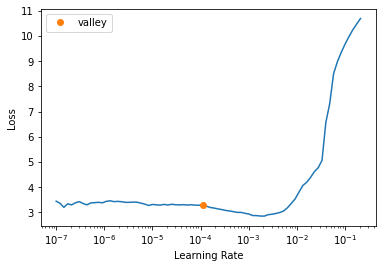

In [ ]:
#Plot of Loss v/s Learning rate
model_learn.lr_find()

In [ ]:
b = dls.one_batch()
preds = model_learn.model(b[0])
len(preds),preds[0], preds[1].shape

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:3578: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


(3,
 tensor(3.3160, device='cuda:0', grad_fn=<NllLossBackward0>),
 torch.Size([2, 81, 50264]))

In [ ]:
model_learn.fit_one_cycle(1, lr_max=3e-5, cbs=fit_cbs)

epoch,train_loss,valid_loss,rouge1,rouge2,rougeL,bertscore_precision,bertscore_recall,bertscore_f1,time


Downloading:   0%|          | 0.00/482 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

epoch,train_loss,valid_loss,rouge1,rouge2,rougeL,bertscore_precision,bertscore_recall,bertscore_f1,time
0,1.691336,1.662459,0.390600,0.174969,0.269073,0.879933,0.897668,0.888634,17:09


In [ ]:
model_learn.show_results(learner=learn, max_n=2)

,text,target,prediction
0,"You wanted to know more about greenwashing, and Scot Case, from environmental marketing firm TerraChoice, answered. Greenwashing expert Scot Case of TerraChoice. ""Why are green products often more expensive than ones that don't say they are green or environmentally friendly? Is it just because green has become a new form of 'premium brand'? Isn't this bad news if we want to make more people environmentally aware when they go shopping?"" Harriet Gladwell. Case: First, it should be noted that not all greener products are more expensive. The remanufactured toner cartridges I purchase at a nationwide office-supply store, for example, carry the same warranty as other cartridges at a 30-percent lower cost. This greener option is less expensive because the manufacturer avoids the cost of manufacturing the plastic and electronic components. They simply reuse the parts from recycled cartridges. There are also greener products that do not cost extra. There are cleaning products and paints, for example, that have been certified as meeting tough environmental standards by EcoLogo or Green Seal that deliver the same high-quality performance one expects without costing any extra. Other greener products might be slightly more expensive initially, but generate substantial savings for the consumer. Energy-efficient compact fluorescent lightbul","Scot Case answers your questions on greenwashing.\nHas green become a new form of ""premium brand""?\nWhat green words and phrases should raise a red flag?\nClick here to read more answers to your questions.","[ Scot Case, from marketing firm TerraChoice, answers your questions about greenwashing .\nNot all greener products are more expensive, he says .\nGreenwashing expert Scot Case: ""Green has become a new form of 'premium brand' ""\nSome greener options are less expensive because they reuse parts from recycled cartridges ., The new constitution would eliminate term limits and allow President Evo Morales to run for another term .\nIt would also give more power to the central government .\nCritics say the referendum is a way for Morales to keep himself in power .\nThe constitution would replace the 1967 charter and give greater voice to indigenous people .]"


## Test the Data

In [ ]:
test_article = """
The past 12 months have been the worst for aviation fatalities so far this decade - with the total of number of people killed if airline 
crashes reaching 1,050 even before the Air Asia plane vanished. Two incidents involving Malaysia Airlines planes - one over eastern Ukraine and the other in the Indian Ocean - led to the deaths of 537 people, while an Air Algerie crash in Mali killed 116 and TransAsia Airways crash in Taiwan killed a further 49 people. The remaining 456 fatalities were largely in incidents involving small commercial planes or private aircraft operating on behalf of companies, governments or organisations. Despite 2014 having the highest number of fatalities so far this decade, the total number of crashes was in fact the lowest since the first commercial jet airliner took off in 1949 - totalling just 111 across the whole world over the past 12 months. The all-time deadliest year for aviation was 1972 when a staggering 2,429 people were killed in a total of 55 plane crashes - including the crash of Aeroflot Flight 217, which killed 174 people in Russia, and Convair 990 Coronado, which claimed 155 lives in Spain. However this year's total death count of 1,212, including those presumed dead on board the missing Air Asia flight, marks a significant rise on the very low 265 fatalities in 2013 - which led to it being named the safest year in aviation since the end of the Second World War. Scroll down for videos. Deadly: The past 12 months have been the worst for aviation fatalities so far this decade - with the total of number of people killed if airline crashes reaching 1,158 even before the Air Asia plane (pictured) vanished. Fatal: Two incidents involving Malaysia Airlines planes - one over eastern Ukraine (pictured) and the other in the Indian Ocean - led to the deaths of 537 people. Surprising: Despite 2014 having the highest number of fatalities so far this decade, the total number of crashes was in fact the lowest since the first commercial jet airliner took off in 1949. 2014 has been a horrific year for Malaysia-based airlines, with 537 people dying on Malaysia Airlines planes, and a further 162 people missing and feared dead in this week's Air Asia incident. In total more than half the people killed in aviation incidents this year had been flying on board Malaysia-registered planes. In January a total of 12 people lost their lives in five separate incidents, while the same number of crashes in February killed 107. 
"""

In [ ]:
outputs = model_learn.blurr_summarize(test_article, early_stopping=True, num_beams=4, num_return_sequences=3)

for idx, o in enumerate(outputs):
    print(f'=== Prediction {idx+1} ===\n{o}\n')

/usr/local/lib/python3.8/dist-packages/transformers/generation/utils.py:1387: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 142 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


=== Prediction 1 ===
{'summary_texts': [" 2014 has been worst year for aviation fatalities so far this decade - with 1,158 deaths .\nTwo incidents involving Malaysia Airlines planes led to the deaths of 537 people .\nThe total number of crashes was in fact the lowest since the first commercial jet airliner took off in 1949 .\n2014's total death count of 1,212 marks a significant rise on the very low 265 fatalities in 2013 .", " 2014 has been worst year for aviation fatalities so far this decade - with 1,158 deaths .\nTwo incidents involving Malaysia Airlines planes led to the deaths of 537 people .\nThe total number of crashes was in fact the lowest since the first commercial jet airliner took off in 1949 .\nThis year's death count of 1,212 marks a significant rise on the very low 265 fatalities in 2013 .", ' 2014 has been worst year for aviation fatalities so far this decade - with 1,158 deaths .\nTwo incidents involving Malaysia Airlines planes led to the deaths of 537 people .\nThe 